In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

from scipy.stats import entropy

In [3]:

# date = datetime.now().strftime("%Y%m%d")
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')


# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

df = pd.read_csv(f"{data_path}clustered/{file}", index_col=0)
df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [4]:
df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [6]:
data = df.iloc[:, 3:]
cluster_centroids = data.groupby('cluster').mean()
cluster_centroids

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000
273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000


In [7]:
grouped_mean = data.groupby('cluster').agg('mean')
grouped_std = data.groupby('cluster').agg('std')

# Renaming columns for clarity
# grouped_stats.columns = [f'{col}_{stat}' for col, stat in grouped_stats.columns]

# Resetting index for easy merging later
grouped_std.reset_index(inplace=True)

# # Merging statistics back to the original DataFrame
# merged_df = pd.merge(data, grouped_stats, on='cluster', how='left')

grouped_std

,cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
0,1,0.121971,0.032180,0.086633,0.153290,0.103961,0.023422,0.167704,0.050877,0.044009,0.020667,0.084224,0.058226,0.078330,0.138640,0.140416,0.057493,0.157189
1,2,0.017815,0.017148,0.115042,0.012323,0.015783,0.007666,0.013341,0.016316,0.019156,0.015485,0.016546,0.022056,0.015012,0.011645,0.141813,0.019297,0.220399
2,3,0.034187,0.032881,0.151223,0.103342,0.061137,0.008615,0.127728,0.031387,0.033241,0.014574,0.066913,0.041867,0.050108,0.113690,0.124812,0.043600,0.107699
3,4,0.000000,0.000000,0.005307,0.000000,0.000000,0.011595,0.002653,0.002600,0.001733,0.005291,0.000000,0.000000,0.000000,0.001654,0.002511,0.001654,0.014187
4,5,0.038545,0.216311,0.031777,0.095632,0.048252,0.010822,0.101390,0.016696,0.023754,0.014705,0.034990,0.022889,0.043433,0.130304,0.201280,0.053691,0.102470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.000542,0.000000,0.000000,0.000000,0.000542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
271,272,0.000000,0.000000,0.005529,0.000000,0.000000,0.000000,0.001660,0.000000,0.000000,0.000000,0.000000,0.001798,0.001660,0.000000,0.005453,0.001726,0.000000
272,273,0.000000,0.000000,0.001521,0.000000,0.002155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002155,0.000000,0.001521,0.000000,0.000000,0.000000
273,274,0.000000,0.013075,0.013819,0.000000,0.002144,0.002018,0.000000,0.000000,0.002287,0.004179,0.002693,0.000000,0.000000,0.000000,0.001319,0.000000,0.005471


In [92]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,253.0,268.0,0.005900,2.0
1,264.0,272.0,0.005907,2.0
2,166.0,251.0,0.006318,2.0
3,246.0,267.0,0.006732,2.0
4,247.0,250.0,0.007763,2.0
...,...,...,...,...
269,78.0,543.0,1.009850,268.0
270,537.0,544.0,1.021762,271.0
271,428.0,545.0,1.238983,273.0
272,214.0,546.0,1.248040,274.0


In [123]:
# xlbl = dendrogram.get_xticklabels()
cluster_centroids.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275],
      dtype='int64', name='cluster', length=275)

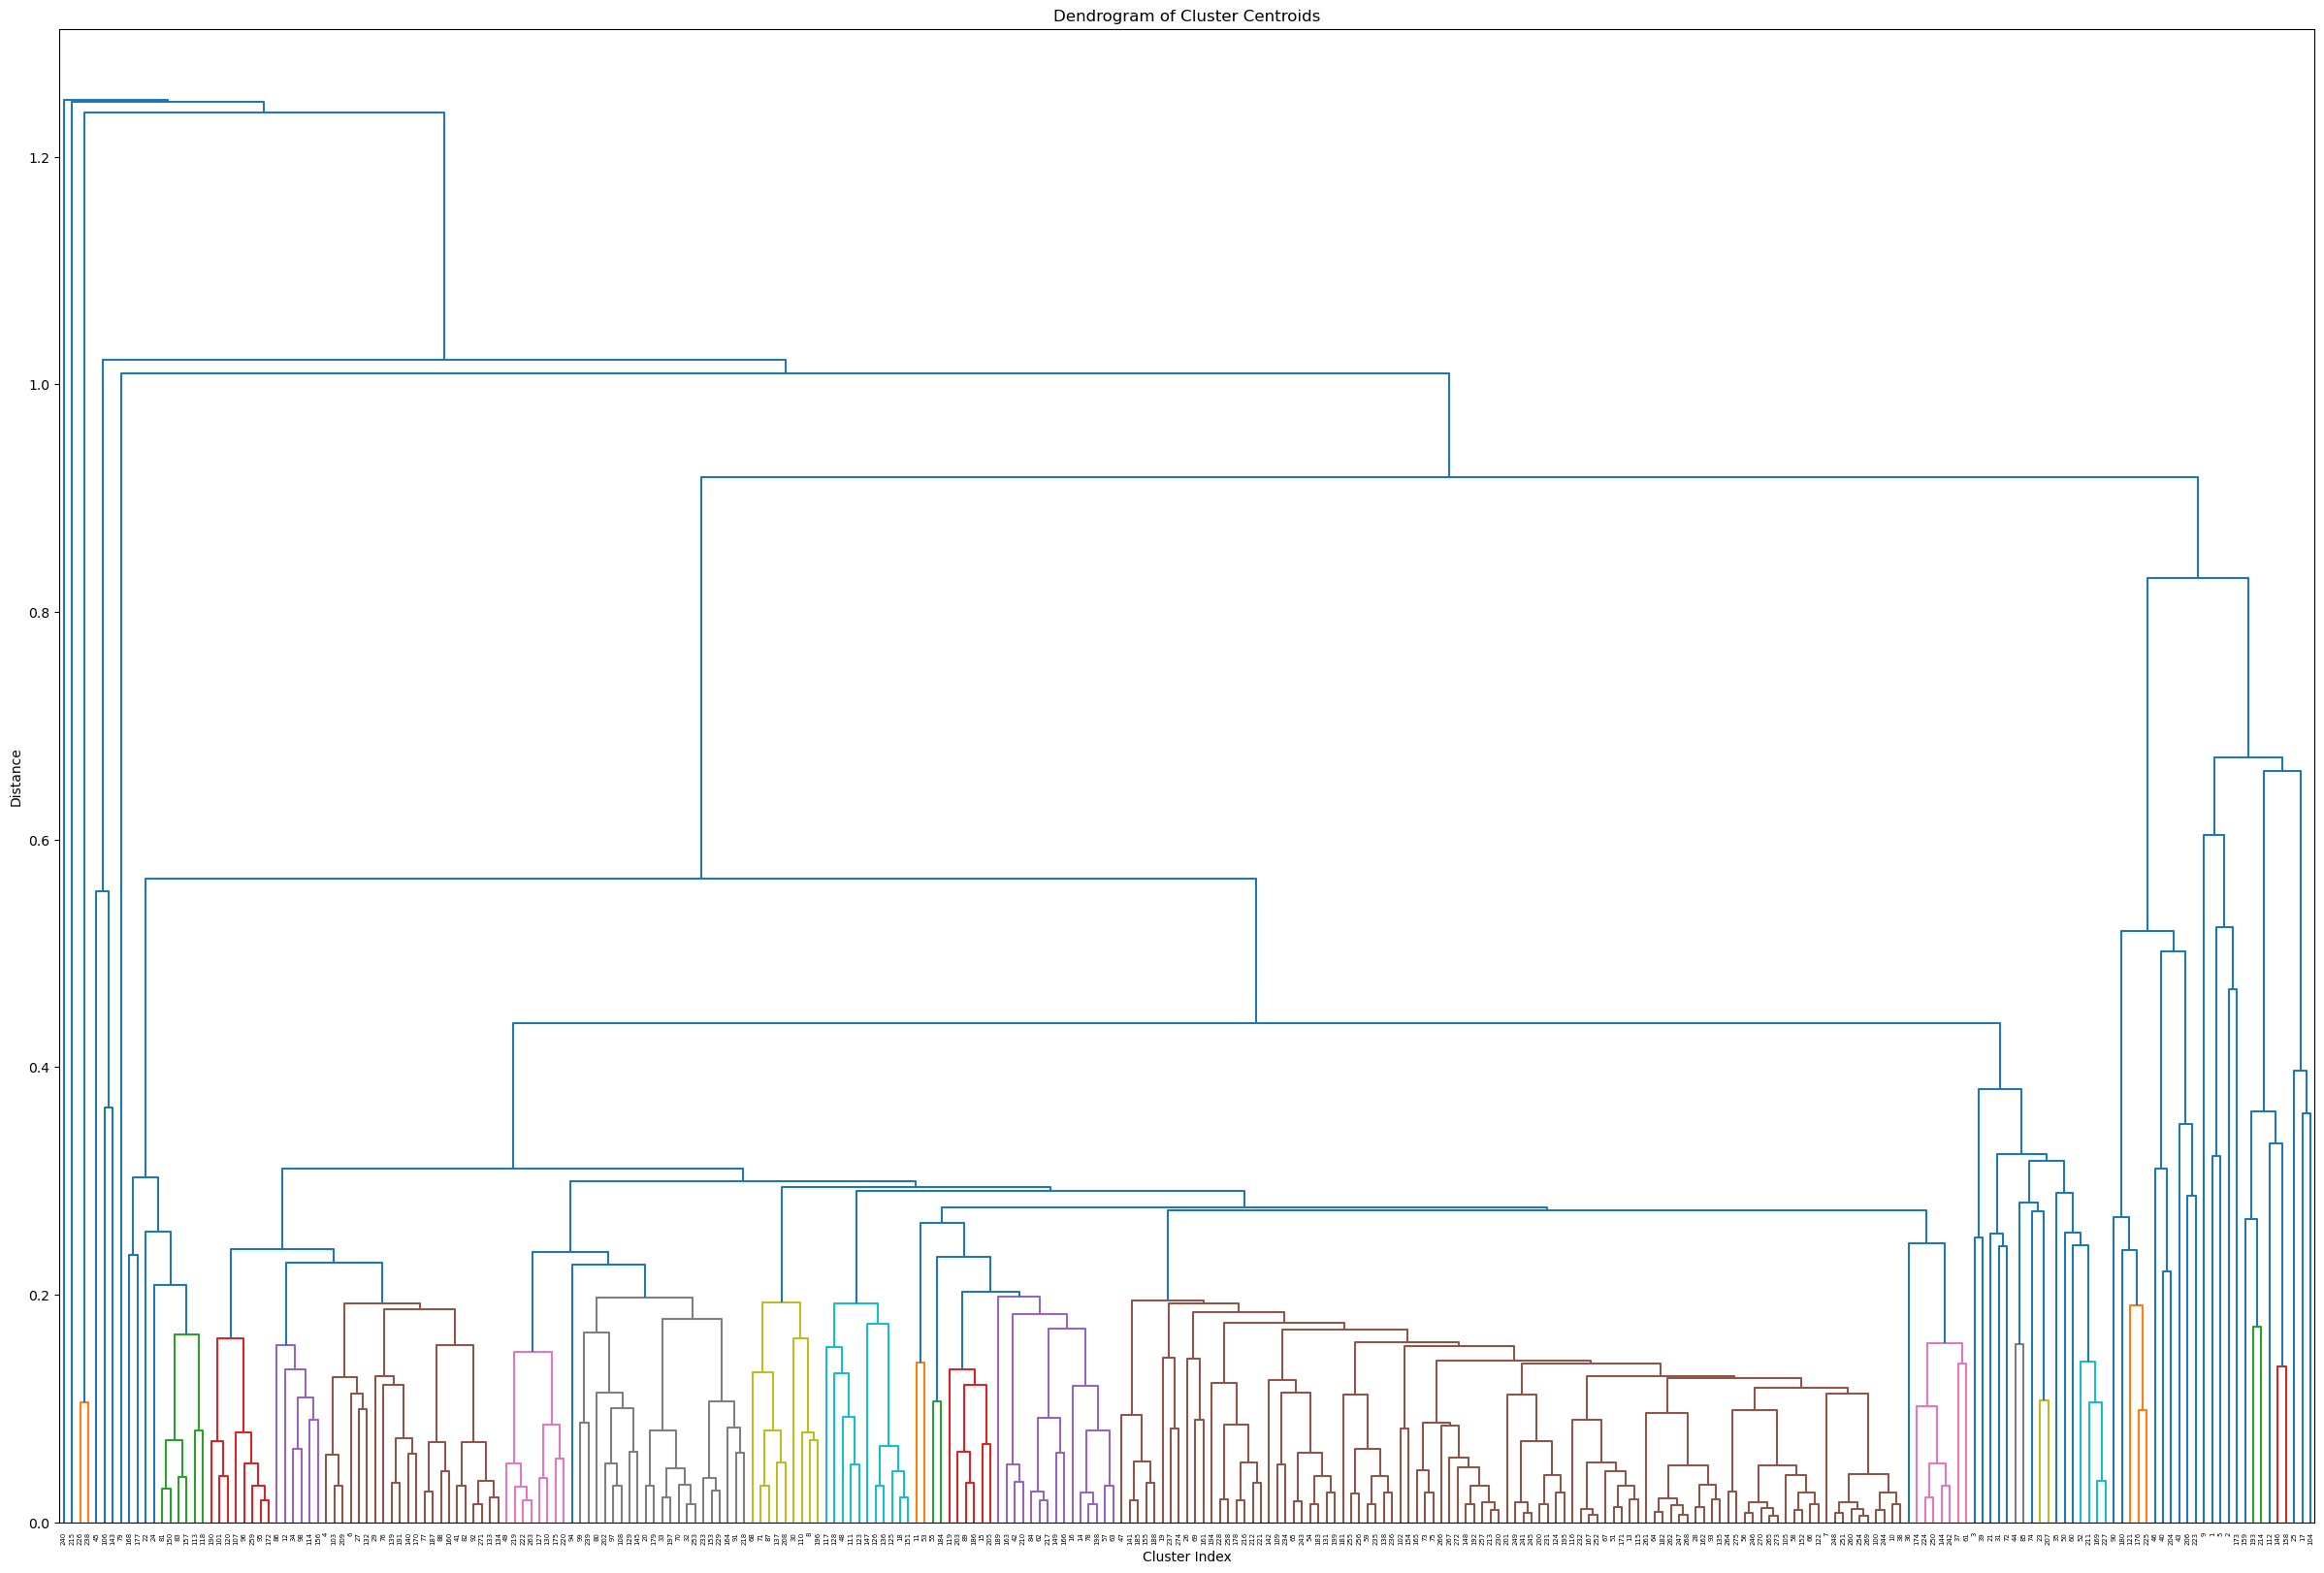

In [8]:

# Compute cluster centroids (average expression profile for each cluster)
cluster_centroids = data.groupby('cluster').mean()

# Perform hierarchical clustering on cluster centroids
linkage_matrix = linkage(cluster_centroids, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(30, 20))
fig = dendrogram(linkage_matrix, labels=cluster_centroids.index, get_leaves=True, orientation='top', color_threshold=0.2)
# figlab = plt.get_fignums()
plt.title('Dendrogram of Cluster Centroids')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.savefig(f'{data_path}plots/cluster_dendriogram.png', bbox_inches='tight', dpi=300)

plt.show()


In [163]:
clus_order = np.array(fig['leaves']) + 1
clus_order

array([240, 215, 226, 238,  45, 106, 143,  79, 168, 177,  22,  24,  81,
       150,  83, 157, 113, 118, 190, 101, 120, 107,  96, 259,  95, 172,
        86,  12,  34,  98, 114, 156,   4, 103, 209,   6,  27, 132,  29,
        76, 139, 191, 140, 170,  77, 187,  88, 160,  41,  82,  92, 271,
       133, 134,  49, 219, 222, 263, 127, 130, 175, 220,  94,  99, 239,
        80, 202,  97, 108, 129, 145,  20, 179,  33, 197,  70,  32, 253,
       233, 153, 229, 164,  91, 218,  68,  71,  87, 137, 208,  30, 110,
         8, 196, 117, 128,  48, 111, 123, 147, 126, 136, 125,  18, 151,
        11,  53,  55, 184, 119, 203,  89, 186,  15, 205, 189, 163,  42,
       210,  84,  62, 217, 149, 166,  16,  14,  78, 198,  57,  63,  47,
       141, 185, 155, 188,  19, 237, 274,  26,  69, 161, 194, 228, 258,
       178, 216, 212, 221, 142, 109, 234,  65, 243,  54, 183, 131, 199,
       181, 255, 256,  59, 235, 138, 236, 102, 154, 165,  73,  75, 266,
       267, 272, 148, 192, 257, 213, 230, 201, 249, 241, 245, 20

In [1]:
linkage_matrix

NameError: name 'linkage_matrix' is not defined

In [10]:
# Grouping by 'cluster' and 'celltype' and getting counts
result = df.groupby(['cluster', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns='cluster', values='Count', fill_value=0)
# Sort by dendrogram
result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result

NameError: name 'clus_order' is not defined

In [9]:
result_percentage = result.div(result.loc['Total_Cells'], axis=1) * 100

# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(10, 6),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title('Low survival cohort stacked Barplot of Cell Types in Clusters')
plt.xticks(fontsize=3)

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_sorted.png', bbox_inches='tight', dpi=300)

plt.show()

NameError: name 'result' is not defined

In [86]:
pairwise_distances

array([0.48426585, 0.30677996, 0.72290278, ..., 0.10768766, 0.09605795,
       0.13340321])

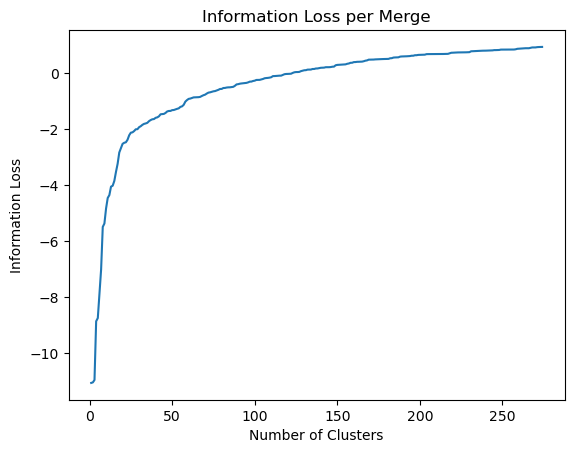

In [61]:

from scipy.spatial.distance import pdist

# Example protein marker expression data (rows: cells, columns: markers)
# protein_expression_data = np.random.rand(10, 16)  # Example dataset of 10 cells and 16 markers

# Calculate pairwise distances between cells using Euclidean distance
pairwise_distances = pdist(cluster_centroids)

# Perform hierarchical clustering to obtain linkage matrix
linkage_matrix = linkage(pairwise_distances, method='average')

# Compute the distance or similarity metric for each merge
merge_distances = linkage_matrix[:, 2]  # Distance/similarity metric is stored in the third column of the linkage matrix

# Calculate information loss metric (e.g., decrease in variance)
# Example: Information loss metric is the change in variance after each merge
initial_variance = np.var(pairwise_distances)
information_loss = [(initial_variance - variance_after_merge) / initial_variance for variance_after_merge in merge_distances]

# Plot the information loss against the number of clusters
num_clusters = range(len(merge_distances), 0, -1)
plt.plot(num_clusters, information_loss)
plt.title('Information Loss per Merge')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Loss')
plt.show()


In [81]:
initial_variance

0.10349175962905857

In [79]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,253.0,268.0,0.005900,2.0
1,264.0,272.0,0.005907,2.0
2,166.0,251.0,0.006318,2.0
3,246.0,267.0,0.006732,2.0
4,247.0,250.0,0.007763,2.0
...,...,...,...,...
269,78.0,543.0,1.009850,268.0
270,537.0,544.0,1.021762,271.0
271,428.0,545.0,1.238983,273.0
272,214.0,546.0,1.248040,274.0


In [7]:
X = df.iloc[:, 3:-1]  # Features (expression levels of markers)
X

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667


In [8]:

X = df.iloc[:, 3:-1]  # Features (expression levels of markers)
y = df.iloc[:, -1]   # Labels (cluster assignments)

# Hierarchical Clustering
# Choose the number of clusters based on your requirements
n_clusters = len(y.unique())  # Assuming each cluster label is unique
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(X)

# Visualization
# Assuming you have 2D data for simplicity
# If you have higher-dimensional data, you may need to use dimensionality reduction techniques for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


MemoryError: Unable to allocate 9.76 TiB for an array with shape (1341065855781,) and data type float64